# Elementary cellular automaton -- chapter 8

In [ ]:
#Import libraries
import scipy as sp
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

![ECA-rule30](https://upload.wikimedia.org/wikipedia/commons/e/e2/One-d-cellular-automate-rule-30.gif)

In [ ]:
#Input table
input_pattern = np.zeros([8,3])
for i in range(8):
    input_pattern[i,:] = [int(x) for x in np.binary_repr(7-i, width=3)]
input_pattern

array([[1., 1., 1.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [ ]:
#Choosing the rule
number = 111

In [ ]:
#Output table
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
output_pattern

[0, 1, 1, 0, 1, 1, 1, 1]

## Simulating

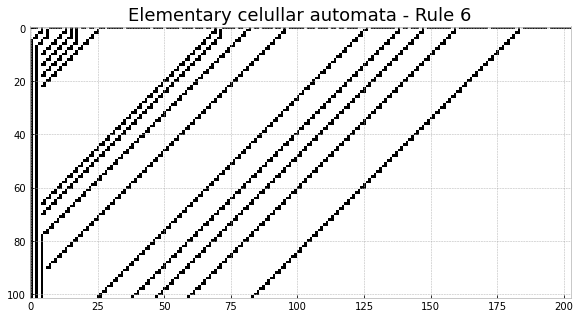

In [ ]:
#Choosing the rule
number = 6
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = np.random.choice(2, columns+2,p=[0.2, 0.8])
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

plt.figure(figsize=(14,5))                 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Elementary celullar automata - Rule {}".format(number),size=18)
plt.show()

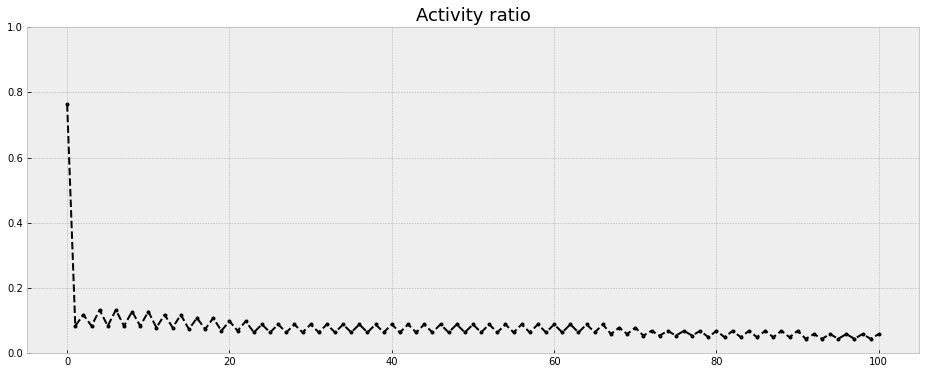

In [ ]:
#Usage efficiency - activity ratio per time
plt.figure(figsize=(16,6)) 
plt.plot(active[0:rows-1],color='black', marker='.',linestyle='--') 
plt.title("Activity ratio",size=18)
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

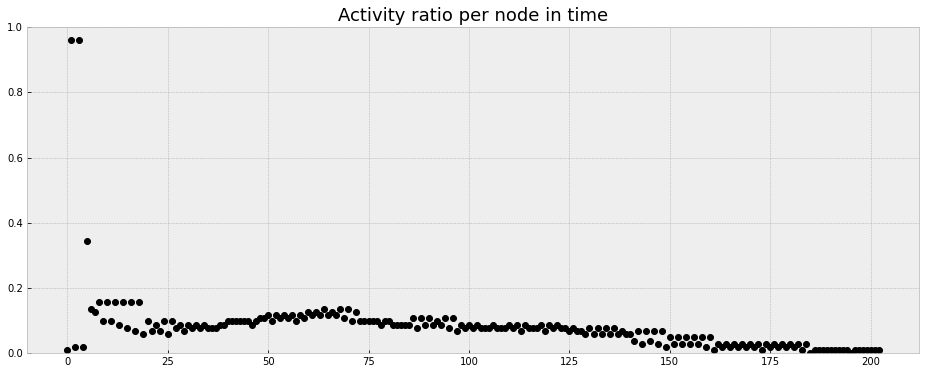

In [ ]:
#Fairness - activity ratio per node over time
aux = np.zeros(columns)
for i in np.arange(0,columns):
    aux[i] = sum(canvas[:,i])

plt.figure(figsize=(16,6)) 
plt.plot(aux/rows,color='black', marker='o',linestyle='') 
plt.title("Activity ratio per node in time",size=18)
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

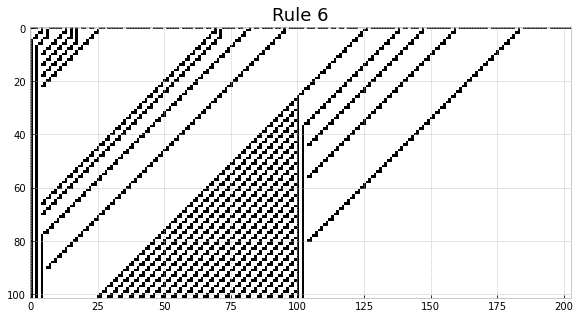

In [ ]:
#Including an attack time
attack_time = 10
#Which node is to be attacked
attaked_node = 101
#Aux array
fake_state = np.zeros(3)

#Running the system
for i in np.arange(0, attack_time-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

#Including an attacker.
for i in np.arange(attack_time, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if j+1 == attaked_node:
                canvas_fake=canvas[i,j:j+3].copy()
                canvas_fake[0]=0
                if np.array_equal(input_pattern[k,:],canvas_fake):
                    canvas[i+1,j+1] = output_pattern[k]
            else:
                if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                    canvas[i+1,j+1] = output_pattern[k]
              
                
plt.figure(figsize=(14,5))                 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Rule {}".format(number),size=18)
plt.show()

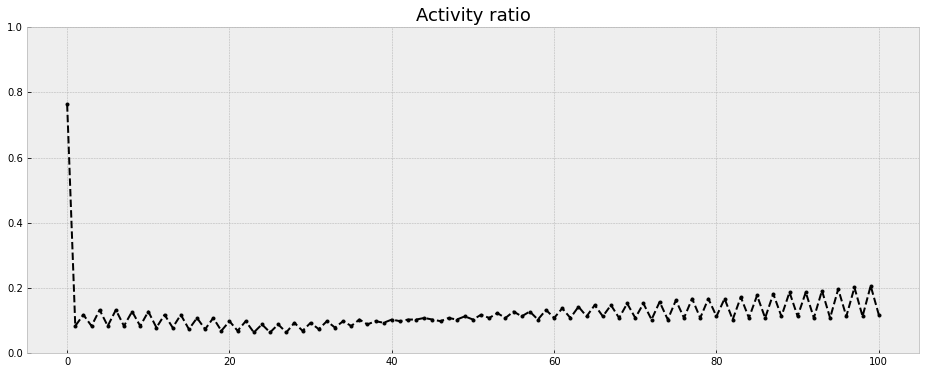

In [ ]:
plt.figure(figsize=(16,6)) 
plt.plot(active[0:rows-1],color='black', marker='.',linestyle='--') 
plt.title("Activity ratio",size=18)
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

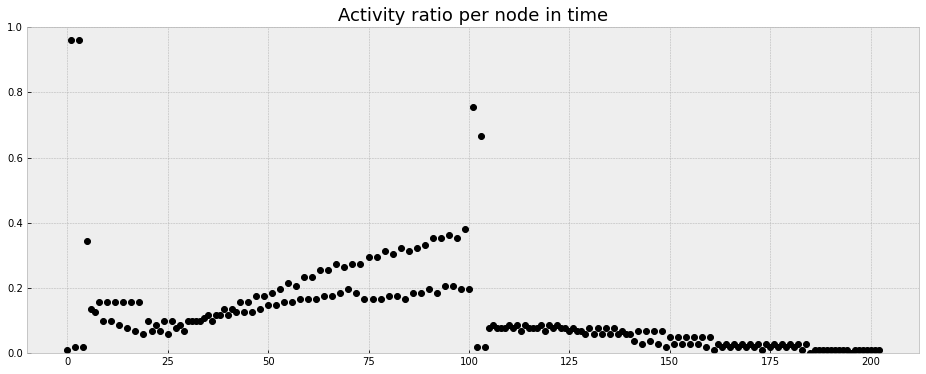

In [ ]:
aux = np.zeros(columns)
for i in np.arange(0,columns):
    aux[i] = sum(canvas[:,i])

plt.figure(figsize=(16,6)) 
plt.plot(aux/rows,color='black', marker='o',linestyle='') 
plt.title("Activity ratio per node in time",size=18)
plt.ylim([0, 1])
plt.grid(True) #grid
plt.show() 

## CPS -- (PHY) Electric circuit from Fig. 10 -- (Data + Decision + Acting) ECA

![Picture title](image-20211019-085339.png)

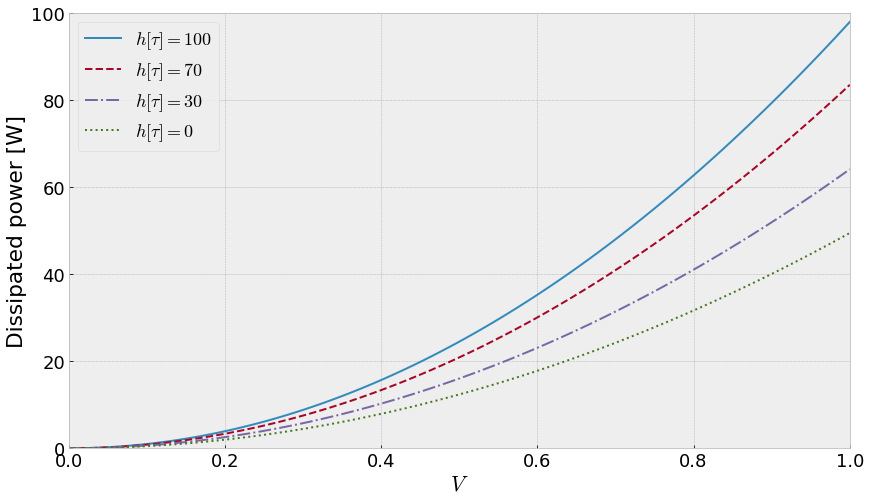

In [ ]:
#Circuit -- CPS############
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
N=100
Rv=0.0001
Rl=1

v = np.linspace(0, 1, 100) 
h=100
R = Rv + Rl/(N+h) # resistence
#
power = v**2/(2*R)
#
plt.plot(v, power,'-',label=r'$h[\tau]=100$')
#
h=70
R = Rv + Rl/(N+h) # resistence
#
power = v**2/(2*R)
#
plt.plot(v, power,'--',label=r'$h[\tau]=70$')
#
h=30
R = Rv + Rl/(N+h) # resistence
#
power = v**2/(2*R)
#
plt.plot(v, power,'-.',label=r'$h[\tau]=30$')
#
h=0
R = Rv + Rl/(N+h) # resistence
#
power = v**2/(2*R)
#
plt.plot(v, power,':',label=r'$h[\tau]=0$')

plt.ylim([0, 100])
plt.xlim([0, 1])
plt.xlabel("$V$")
plt.ylabel("Dissipated power [W]")
plt.legend( loc ="upper left")
#plt.savefig('power-voltage-CA.pdf',pad_inches=0) 
plt.show()

## CPS with different CA rules: Rule X

In [ ]:
#Random state with probabilities defined as below.
initial_condition = np.random.choice(2, columns+2,p=[0.5, 0.5])

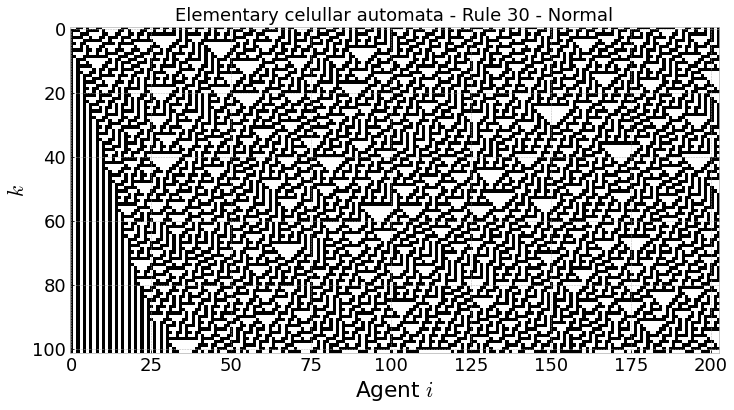

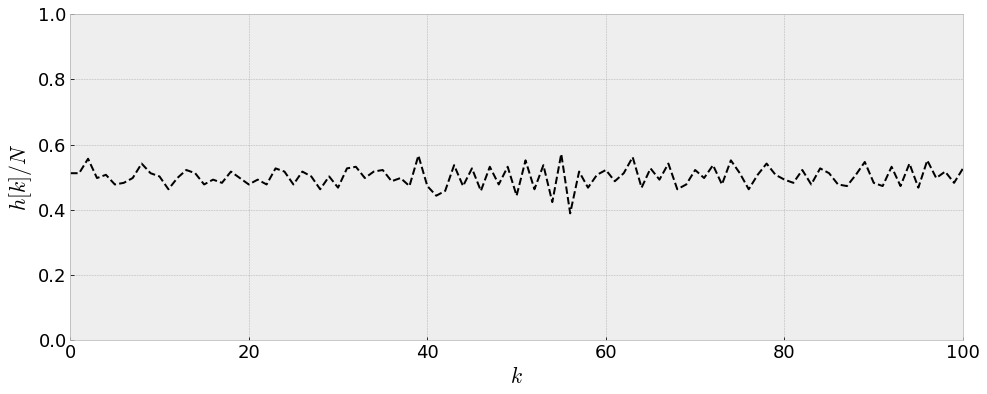

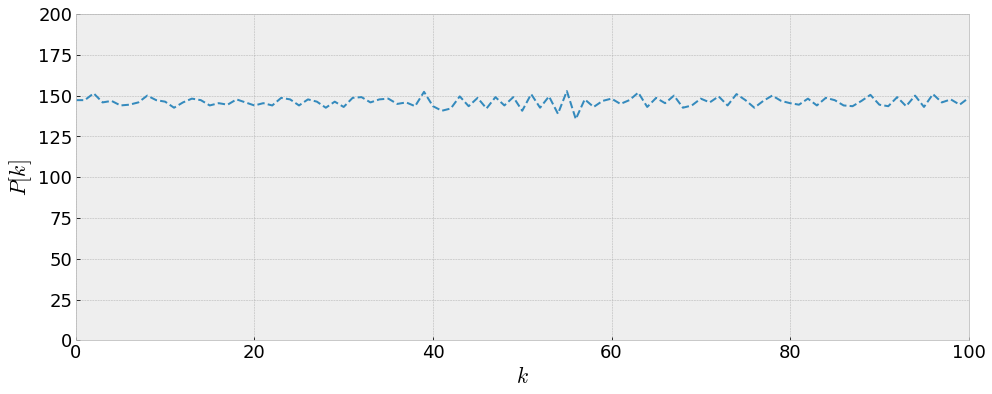

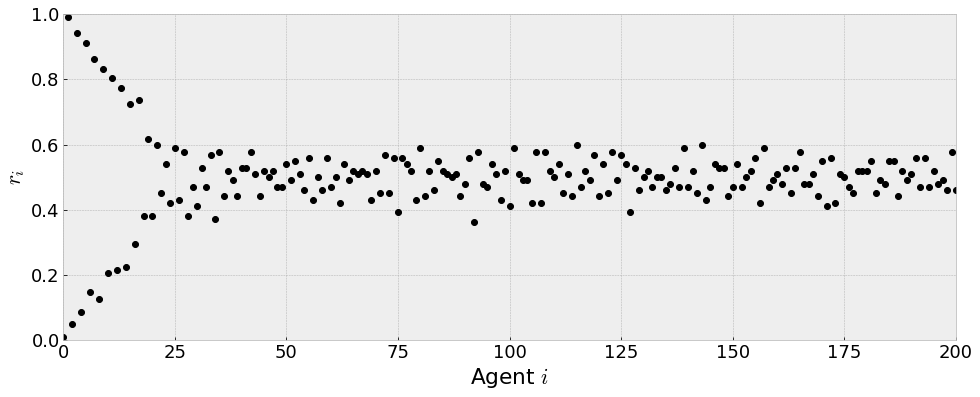

In [ ]:
#Choosing the rule
number = 30
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


plt.figure(figsize=(16,6))                 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Elementary celullar automata - Rule {} - Normal".format(number),size=18)
plt.ylabel("$k$")
plt.xlabel("Agent $i$")
#plt.savefig('{}-CA.pdf'.format(number),pad_inches=0) 
plt.show()


plt.figure(figsize=(16,6)) 
plt.plot(active[0:rows-1],color='black',linestyle='--') 
#plt.title("Activity ratio",size=22)
plt.ylim([0, 1])
plt.xlim([0, 100])
plt.ylabel("$h[k]/N$")
plt.xlabel("$k$")
plt.grid(True) #grid
#plt.savefig('active-CA{}.pdf'.format(number),pad_inches=0) 
plt.show() 

N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power = v**2/(2*R)
#
plt.figure(figsize=(16,6)) 
plt.plot(power,'--')
plt.ylim([0, 200])
plt.xlim([0, 100])
plt.xlabel("$k$")
plt.ylabel("$P[k]$")
#plt.savefig('power-CA{}.pdf'.format(number),pad_inches=0) 
plt.show()

aux = np.zeros(columns)
for i in np.arange(0,columns):
    aux[i] = sum(canvas[:,i])

plt.figure(figsize=(16,6)) 
plt.rcParams.update({'font.size': 18})
plt.plot(aux/rows,color='black', marker='o',linestyle='') 
#plt.title("Activity ratio per node in time",size=18)
plt.ylim([0, 1])
plt.xlim([0, 200])
plt.ylabel("$r_i$")
plt.xlabel("Agent $i$")
plt.grid(True) #grid
#plt.savefig('activity-node-CA{}.pdf'.format(number),pad_inches=0) 
plt.show()

## Adding an attack

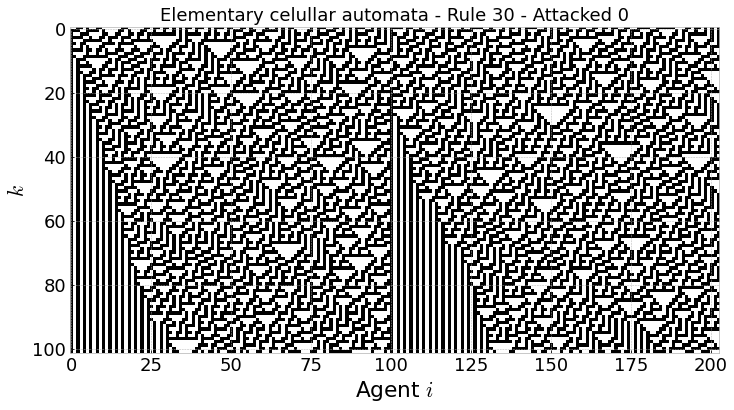

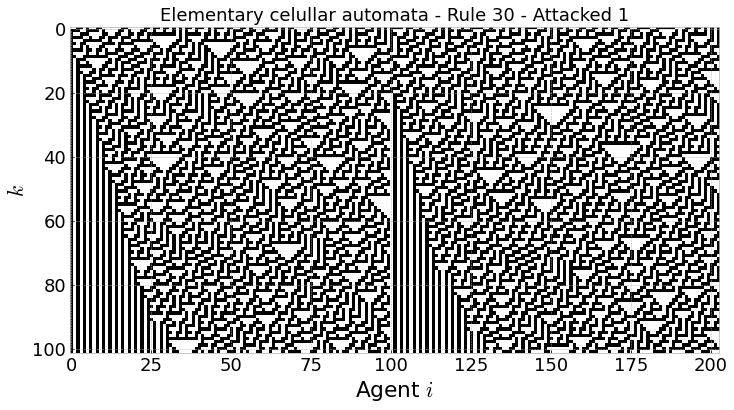

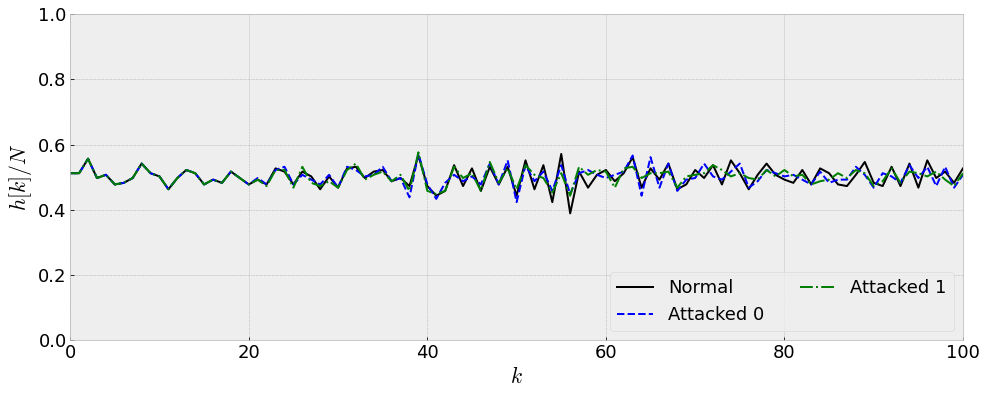

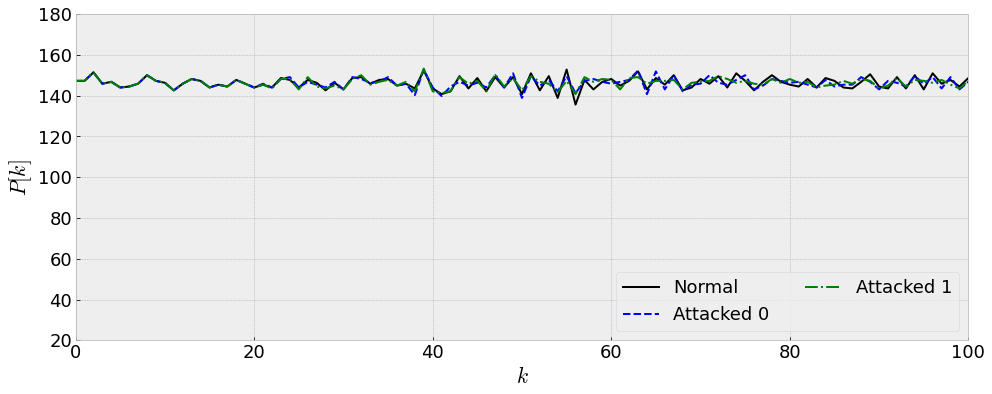

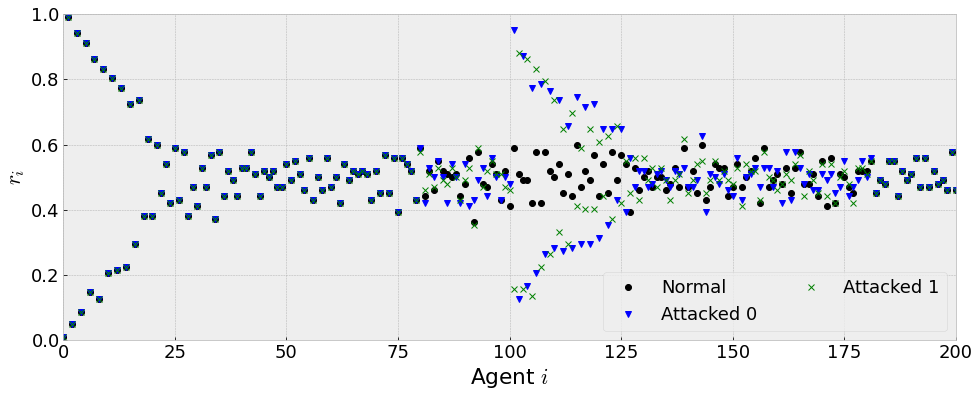

In [ ]:
#Including an attack time
attack_time = 21
#Which node is to be attacked
attaked_node = 101
#Aux array
fake_state = np.zeros(3)
active2 = np.zeros(rows)
#Running the system
for i in np.arange(0, attack_time-1):
    active2[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

#Including an attacker.
for i in np.arange(attack_time-1, rows-1):
    active2[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if j+1 == attaked_node:
                canvas_fake=canvas[i,j:j+3].copy()
                canvas_fake[0]=0
                if np.array_equal(input_pattern[k,:],canvas_fake):
                    canvas[i+1,j+1] = output_pattern[k]
            else:
                if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                    canvas[i+1,j+1] = output_pattern[k]
              
                
plt.figure(figsize=(16,6))                 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Elementary celullar automata - Rule {} - Attacked 0".format(number),size=18)
plt.ylabel("$k$")
plt.xlabel("Agent $i$")
#plt.savefig('{}-CA-attack-0.pdf'.format(number),pad_inches=0) 
plt.show()

aux2 = np.zeros(columns)
for i in np.arange(0,columns):
    aux2[i] = sum(canvas[:,i])

active3 = np.zeros(rows)
#Running the system
for i in np.arange(0, attack_time-1):
    active3[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

count=0
#Including an attacker.
for i in np.arange(attack_time-1, rows-1):
    active3[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if j+1 == attaked_node:
                canvas_fake=canvas[i,j:j+3].copy()
                canvas_fake[0]=1
                count=count+1
                if np.array_equal(input_pattern[k,:],canvas_fake):
                    canvas[i+1,j+1] = output_pattern[k]
            else:
                if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                    canvas[i+1,j+1] = output_pattern[k]
              
                
plt.figure(figsize=(16,6))                 
plt.imshow(canvas[:, 1:columns+1], cmap='Greys',interpolation='nearest')
plt.title("Elementary celullar automata - Rule {} - Attacked 1".format(number),size=18)
plt.ylabel("$k$")
plt.xlabel("Agent $i$")
#plt.savefig('{}-CA-attack-1.pdf'.format(number),pad_inches=0) 
plt.show()


aux3 = np.zeros(columns)
for i in np.arange(0,columns):
    aux3[i] = sum(canvas[:,i])

plt.figure(figsize=(16,6)) 
plt.plot(active[0:rows-1],color='black', linestyle='-',label='Normal') 
plt.plot(active2[0:rows-1],color='blue', linestyle='--',label='Attacked 0') 
plt.plot(active3[0:rows-1],color='green', linestyle='-.',label='Attacked 1') 
#plt.title("Activity ratio",size=18)
plt.ylim([0, 1])
plt.xlim([0, 100])
plt.ylabel("$h[k]/N$")
plt.xlabel("$k$")
plt.grid(True) #grid
plt.legend( loc ="lower right", ncol=2)
#plt.savefig('active-CA{}-attack.pdf'.format(number),pad_inches=0) 
plt.show() 

N=201
v=1
#
R = Rv + Rl/(N+active2[0:rows-1]*200) # resistence
#
power2 = v**2/(2*R)
#

#
R = Rv + Rl/(N+active3[0:rows-1]*200) # resistence
#
power3 = v**2/(2*R)
#

plt.figure(figsize=(16,6)) 
plt.plot(power,'-',color='black',label='Normal')
plt.plot(power2,'--',color='blue',label='Attacked 0')
plt.plot(power3,color='green',linestyle='-.',label='Attacked 1') 
plt.ylim([20, 180])
plt.xlim([0, 100])
plt.xlabel("$k$")
plt.ylabel("$P[k]$")
plt.legend( loc ="lower right", ncol=2)
#plt.savefig('power-CA{}-attack.pdf'.format(number),pad_inches=0) 
plt.show()

plt.figure(figsize=(16,6)) 
plt.plot(aux/rows,color='black', marker='o',linestyle='',label='Normal') 
plt.plot(aux2/rows,color='blue', marker='v',linestyle='',label='Attacked 0') 
plt.plot(aux3/rows,color='green', marker='x', linestyle='',label='Attacked 1') 
#plt.title("Activity ratio per node in time",size=18)
plt.ylim([0, 1])
plt.xlim([0, 200])
plt.ylabel("$r_i$")
plt.xlabel("Agent $i$")
plt.grid(True) #grid
plt.legend( loc ="lower right", ncol=2)
#plt.savefig('activity-node-CA{}-attack.pdf'.format(number),pad_inches=0) 
plt.show()

## Optimization

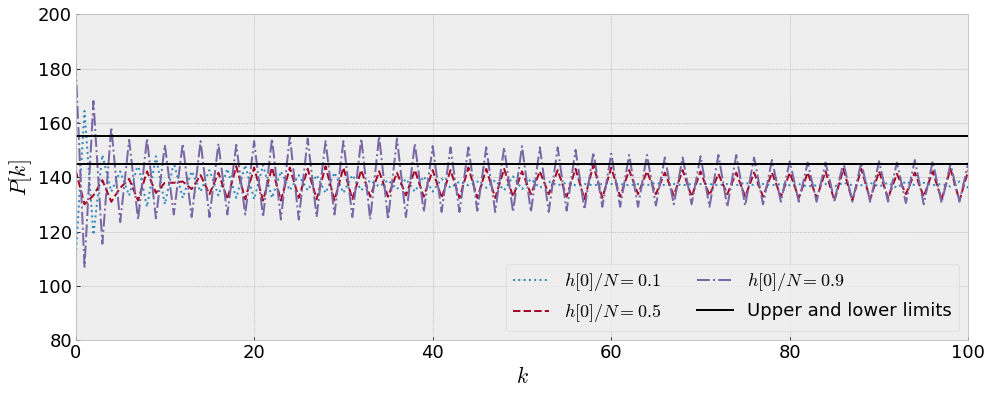

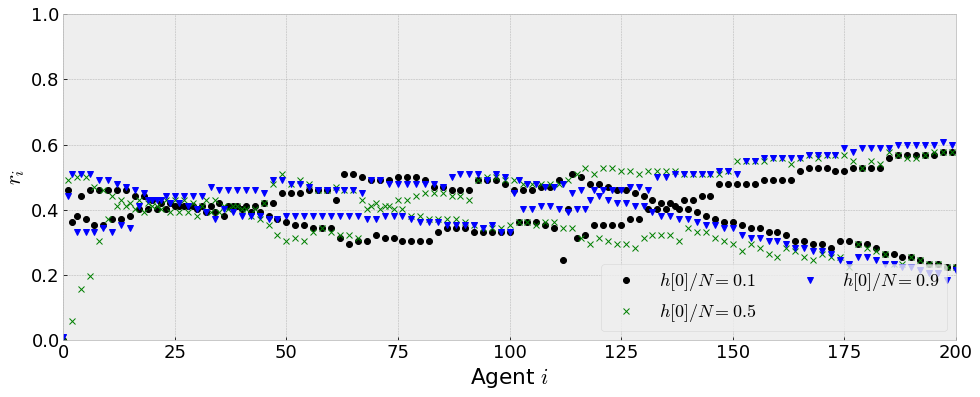

In [ ]:
#Choosing the rule
number = 65

###0.9 / 0.1
#Random state with probabilities defined as below.
initial_condition = np.random.choice(2, columns+2,p=[0.9, 0.1])
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]

aux1 = np.zeros(columns)
for i in np.arange(0,columns):
    aux1[i] = sum(canvas[:,i])


N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power1 = v**2/(2*R)
#

###0.5 / 0.5
#Random state with probabilities defined as below.
initial_condition = np.random.choice(2, columns+2,p=[0.5, 0.5])
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


aux2 = np.zeros(columns)
for i in np.arange(0,columns):
    aux2[i] = sum(canvas[:,i])



N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power2 = v**2/(2*R)
#

###0.1 / 0.9
initial_condition = np.random.choice(2, columns+2,p=[0.1, 0.9])
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


aux3 = np.zeros(columns)
for i in np.arange(0,columns):
    aux3[i] = sum(canvas[:,i])



N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power3 = v**2/(2*R)
#

#Lower limit
power_desired_lower = 145

#Upper limit
power_desired_upper = 155

plt.figure(figsize=(16,6)) 
plt.plot(power1,':',label='$h[0]/N = 0.1$')
plt.plot(power2,'--',label='$h[0]/N = 0.5$')
plt.plot(power3,'-.',label='$h[0]/N = 0.9$')
plt.plot([0,100],[power_desired_lower,power_desired_lower],'k-',label='Upper and lower limits')
plt.plot([0,100],[power_desired_upper,power_desired_upper],'k-')
plt.ylim([80, 200])
plt.xlim([0, 100])
plt.xlabel("$k$")
plt.ylabel("$P[k]$")
plt.legend( loc ="lower right", ncol=2)
plt.savefig('power-CA-initial-cond-rule{}.pdf'.format(number),pad_inches=0) 
plt.show()


plt.figure(figsize=(16,6)) 
plt.plot(aux1/rows,color='black', marker='o',linestyle='',label='$h[0]/N = 0.1$') 
plt.plot(aux2/rows,color='green', marker='x',linestyle='',label='$h[0]/N = 0.5$') 
plt.plot(aux3/rows,color='blue', marker='v',linestyle='',label='$h[0]/N = 0.9$') 
#plt.title("Activity ratio per node in time",size=18)
plt.ylim([0, 1])
plt.xlim([0, 200])
plt.ylabel("$r_i$")
plt.xlabel("Agent $i$")
plt.grid(True) #grid
plt.legend( loc ="lower right", ncol=2)
plt.savefig('activity-node-CA{}-dist.pdf'.format(number),pad_inches=0) 
plt.show()

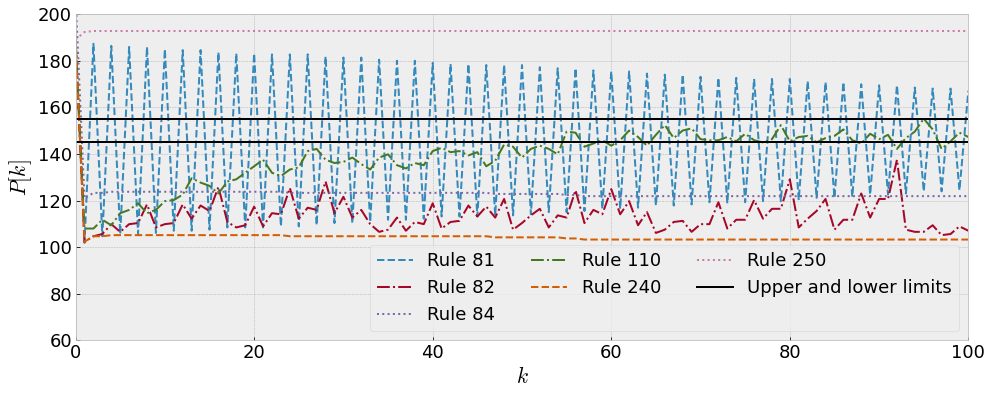

In [ ]:
#Random state with probabilities defined as below.
initial_condition = np.random.choice(2, columns+2,p=[0.05, 0.95])

#Choosing the rule
number = 81


output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power1 = v**2/(2*R)
#

#Choosing the rule
number = 82
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power2 = v**2/(2*R)
#

#Choosing the rule
number = 84
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


N=240
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power3 = v**2/(2*R)
#

#Choosing the rule
number = 84
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power4 = v**2/(2*R)
#


#Choosing the rule
number = 250
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power5 = v**2/(2*R)
#

#Choosing the rule
number = 110
output_pattern = [int(x) for x in np.binary_repr(number, width=8)]
#Number of elements
columns = 203
rows = int(columns/2)+1
#Initial state
canvas = np.zeros([rows, columns+2])
active = np.zeros(rows)
#Random state with probabilities defined as below.
canvas [0] = initial_condition
#Running the system
for i in np.arange(0, rows-1):
    active[i] = sum(canvas[i,1:columns+1])/columns
    for j in np.arange(0,columns):
        for k in range(8):
            if np.array_equal(input_pattern[k,:],canvas[i,j:j+3]):
                canvas[i+1,j+1] = output_pattern[k]


N=201
v=1
#
R = Rv + Rl/(N+active[0:rows-1]*200) # resistence
#
power6 = v**2/(2*R)
#

#Lower limit
power_desired_lower = 145

#Upper limit
power_desired_upper = 155

plt.figure(figsize=(16,6)) 
plt.plot(power1,'--',label='Rule 81')
plt.plot(power2,'-.',label='Rule 82')
plt.plot(power3,':',label='Rule 84')
plt.plot(power6,'-.',label='Rule 110')
plt.plot(power4,'--',label='Rule 240')
plt.plot(power5,':',label='Rule 250')
plt.plot([0,100],[power_desired_lower,power_desired_lower],'k-',label='Upper and lower limits')
plt.plot([0,100],[power_desired_upper,power_desired_upper],'k-')
plt.ylim([60, 200])
plt.xlim([0, 100])
plt.xlabel("$k$")
plt.ylabel("$P[k]$")
plt.legend( loc ="lower right", ncol=3)
plt.savefig('power-CA-diff-rules-0-100.pdf'.format(number),pad_inches=0) 
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea736d9a-8501-4429-86ea-0521db259491' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>